<a href="https://colab.research.google.com/github/Ishanatri133/FIFA-data-analysis/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggleb

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 149M/163M [00:00<00:00, 191MB/s]
100% 163M/163M [00:00<00:00, 195MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:0])

['with_mask_2522.jpg', 'with_mask_334.jpg', 'with_mask_1027.jpg', 'with_mask_3434.jpg', 'with_mask_2941.jpg']
[]


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:0])

['without_mask_375.jpg', 'without_mask_1498.jpg', 'without_mask_1626.jpg', 'without_mask_2480.jpg', 'without_mask_560.jpg']
[]


In [ ]:
print("number of maked files are :", len(with_mask_files))
print("number of without mask files are :", len(without_mask_files))

number of maked files are : 3725
number of without mask files are : 3828


In [ ]:
with_mask_label = [1]*3725
without_mask_label = [1]*3828


In [ ]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


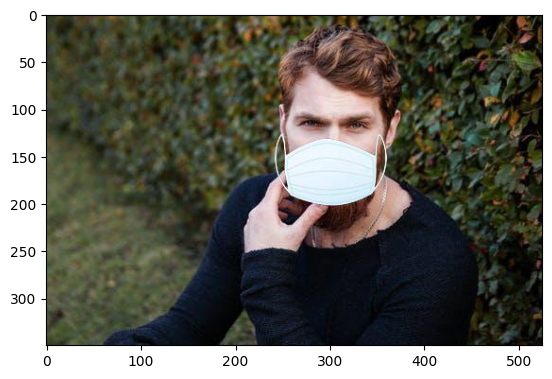

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

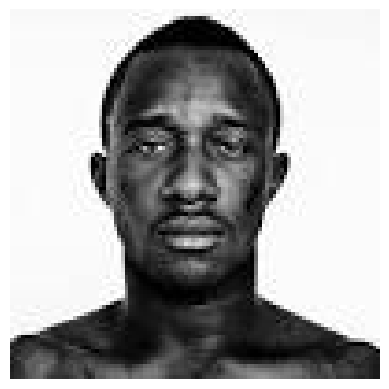

In [ ]:
image_path = '/content/data/without_mask/without_mask_1.jpg'  # Replace with the actual path of your image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # This line is optional, it removes the axes and ticks for a cleaner display
plt.show()


In [ ]:
 with_mask_path = '/content/data/with_mask/'
 data =[]
 for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[1]

array([[[111, 107, 121],
        [128, 124, 138],
        [133, 129, 143],
        ...,
        [ 77,  78,  76],
        [107, 107, 105],
        [140, 140, 138]],

       [[126, 122, 136],
        [128, 124, 138],
        [127, 123, 137],
        ...,
        [ 61,  62,  60],
        [ 78,  78,  76],
        [100, 100,  98]],

       [[132, 129, 143],
        [123, 120, 134],
        [118, 115, 129],
        ...,
        [ 58,  58,  56],
        [ 65,  64,  62],
        [ 73,  73,  71]],

       ...,

       [[227, 215, 196],
        [230, 219, 199],
        [237, 226, 206],
        ...,
        [ 47,  47,  57],
        [ 52,  52,  64],
        [ 50,  50,  61]],

       [[232, 223, 202],
        [233, 224, 204],
        [237, 227, 209],
        ...,
        [ 56,  56,  67],
        [ 58,  58,  72],
        [ 58,  58,  70]],

       [[236, 228, 209],
        [236, 228, 209],
        [238, 229, 211],
        ...,
        [ 60,  60,  71],
        [ 61,  61,  73],
        [ 63,  63,  75]]

In [ ]:
data[1].shape

(128, 128, 3)

In [ ]:
X= np.array(data)
Y= np.array(labels)
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 1 1 1]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[1.        , 0.91764706, 0.8745098 ],
        [0.88627451, 0.8       , 0.75294118],
        [0.6745098 , 0.58823529, 0.5372549 ],
        ...,
        [0.18823529, 0.16078431, 0.12941176],
        [0.19607843, 0.17647059, 0.14509804],
        [0.2       , 0.18431373, 0.14901961]],

       [[0.65882353, 0.57254902, 0.5254902 ],
        [0.50588235, 0.41960784, 0.36862745],
        [0.29411765, 0.20784314, 0.15686275],
        ...,
        [0.16078431, 0.13333333, 0.10196078],
        [0.18431373, 0.16078431, 0.12941176],
        [0.20392157, 0.18039216, 0.14509804]],

       [[0.43921569, 0.35294118, 0.30196078],
        [0.46666667, 0.38039216, 0.3254902 ],
        [0.49803922, 0.41176471, 0.36078431],
        ...,
        [0.17647059, 0.14117647, 0.10980392],
        [0.18823529, 0.15686275, 0.12156863],
        [0.2       , 0.16470588, 0.12941176]],

       ...,

       [[0.43921569, 0.38039216, 0.29803922],
        [0.30588235, 0.24705882, 0.18431373],
        [0.09803922, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes= 2
model= keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',  # For multi-label classification use 'binary_crossentropy'
              optimizer='adam',            # Popular optimizer for most cases
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 101s 583ms/step - loss: 0.0135 - accuracy: 0.9930 - val_loss: 2.4333e-07 - val_accuracy: 1.0000
Epoch 2/5
170/170 [==============================] - 93s 548ms/step - loss: 7.1895e-04 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
170/170 [==============================] - 95s 560ms/step - loss: 6.8176e-04 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
170/170 [==============================] - 95s 561ms/step - loss: 8.6761e-04 - accuracy: 0.9996 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
170/170 [==============================] - 90s 532ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 181ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy = 1.0


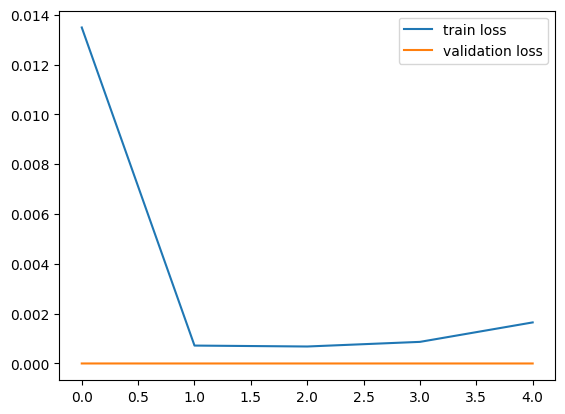

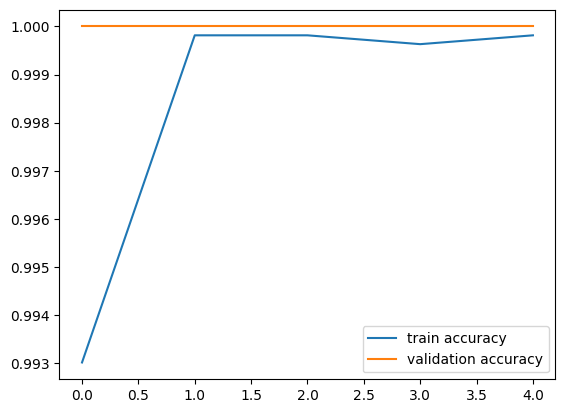

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/clear-mask.png


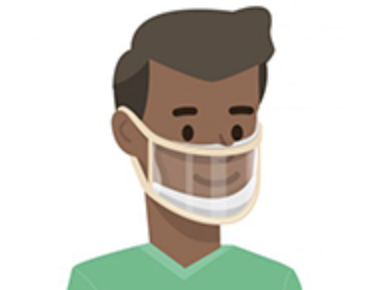

1/1 [==============================] - 0s 98ms/step
[[0. 1.]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')